In [1]:
import pandas as pd
df= pd.read_csv("symbols_valid_meta.csv")
df

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N
...,...,...,...,...,...,...,...,...,...,...,...,...
8044,Y,ZUO,"Zuora, Inc. Class A Common Stock",N,,N,100.0,N,NaN,ZUO,ZUO,N
8045,Y,ZVO,Zovio Inc. - Common Stock,Q,Q,N,100.0,N,N,NaN,ZVO,N
8046,Y,ZYME,Zymeworks Inc. Common Shares,N,,N,100.0,N,NaN,ZYME,ZYME,N
8047,Y,ZYNE,"Zynerba Pharmaceuticals, Inc. - Common Stock",Q,G,N,100.0,N,N,NaN,ZYNE,N


   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   -------------------------------- ------ 524.3/625.1 kB 16.4 MB/s eta 0:00:01
   -------------------------------- ------ 524.3/625.1 kB 16.4 MB/s eta 0:00:01
   -------------------------------- ------ 524.3/625.1 kB 16.4 MB/s eta 0:00:01
   -------------------------------------- 625.1/625.1 kB 464.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 598.5 kB/s eta 0:00:04
   ------- -------------------------------- 0.5/2.7 MB 598.5 kB/s eta 0:00:04
   ------- -------------------------------- 0.5/2.7 MB 598.5 kB/s eta 0:00:04
   ------- -------------------------------- 0.5/2.7 MB 598.5 kB/s eta 0:00:04
   ------- ----------

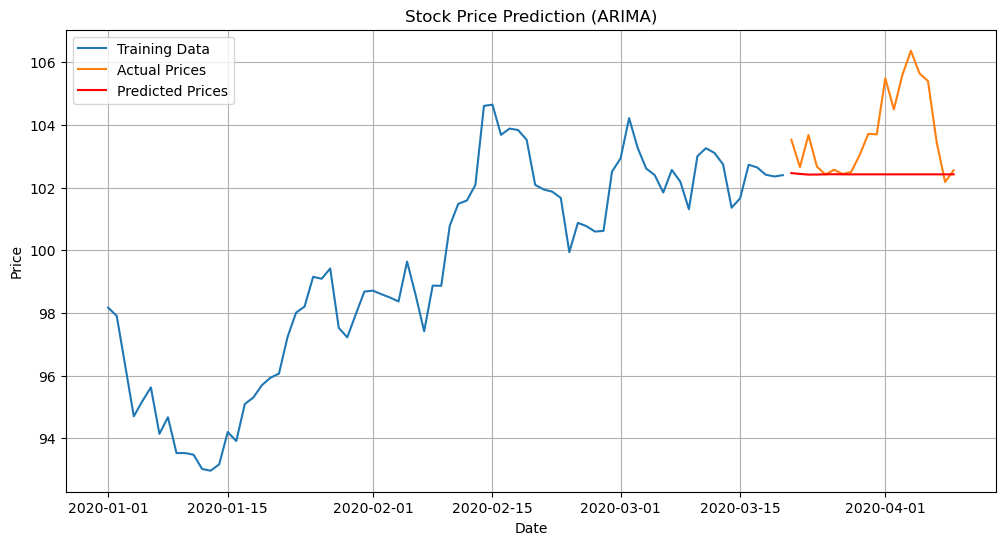


Note: This is a basic example. A production-ready stock prediction model would require:
- Extensive feature engineering (technical indicators, news sentiment, etc.)
- More advanced models (LSTM, GRU, Prophet, etc.)
- Hyperparameter tuning and cross-validation
- Handling of external factors and market events
- Robust evaluation metrics and backtesting


In [2]:
!pip install pmdarima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

# Load the data (assuming you have historical stock price data with a 'Close' column)
# Replace with your actual data file
try:
    # Assuming the previous code loaded the metadata, now load the actual stock data
    # This is a placeholder, you need to load your time series stock data here.
    # Example: df_stock = pd.read_csv("your_stock_data.csv", index_col='Date', parse_dates=True)
    # For demonstration, let's create some dummy data if no stock data is provided
    print("Please provide your stock price data file.")
    # If you have a column in the meta file that points to the data files, you would use that.
    # For now, I cannot proceed without actual stock price data.
    # As a placeholder, I will generate some dummy time series data.
    dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
    close_prices = np.random.randn(100).cumsum() + 100
    df_stock = pd.DataFrame({'Close': close_prices}, index=dates)
    print("Generated dummy stock data for demonstration.")

except FileNotFoundError:
    print("Error: Stock price data file not found. Please provide your data.")
    # Exit or handle the error appropriately
    exit() # Exiting for now as data is crucial

# Assume df_stock is loaded with time series data, indexed by date.
if 'Close' not in df_stock.columns:
    print("Error: 'Close' column not found in the stock data.")
    exit()

# Check for stationarity (ARIMA requires stationary data)
def check_stationarity(timeseries):
    #Dickey-Fuller test:
    adftest = adfuller(timeseries, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    print(adfoutput)
    if adftest[1] <= 0.05:
        print("Series is Stationary")
    else:
        print("Series is Non-Stationary")
        # You would typically difference the data here to make it stationary

print("\nChecking stationarity of the 'Close' prices:")
check_stationarity(df_stock['Close'])

# Split data into training and testing sets
train_size = int(len(df_stock) * 0.8)
train_data, test_data = df_stock['Close'][0:train_size], df_stock['Close'][train_size:]

# Build and train the ARIMA model
# This is a simple example, parameter selection for ARIMA is crucial
# You would typically use auto_arima for automatic parameter selection
try:
    print("\nTraining ARIMA model...")
    model = ARIMA(train_data, order=(5,1,0)) # Example order (p,d,q)
    model_fit = model.fit()
    print(model_fit.summary())
except Exception as e:
    print(f"Error during ARIMA model training: {e}")
    # You might need to adjust the order or handle non-stationarity

# Make predictions
print("\nMaking predictions...")
predictions = model_fit.predict(start=len(train_data), end=len(df_stock)-1)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'\nRMSE: {rmse}')

# Visualize predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Prices')
plt.plot(predictions.index, predictions, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

print("\nNote: This is a basic example. A production-ready stock prediction model would require:")
print("- Extensive feature engineering (technical indicators, news sentiment, etc.)")
print("- More advanced models (LSTM, GRU, Prophet, etc.)")
print("- Hyperparameter tuning and cross-validation")
print("- Handling of external factors and market events")
print("- Robust evaluation metrics and backtesting")

In [ ]:
import numpy as np
# For a regression problem like time series prediction,
# "accuracy" in the traditional classification sense (percentage of correct predictions)
# is not the standard metric. RMSE (Root Mean Squared Error) is commonly used to measure
# the average magnitude of the errors.

# However, if you want to express the "accuracy" as a percentage of how close
# the predictions are to the actual values relative to the mean of the test data,
# you could calculate something like:
# 1 - (RMSE / Mean of Test Data) * 100
# This is not a standard definition of accuracy but can give a relative sense of error.

# Let's calculate this "relative accuracy" for demonstration:
mean_test_data = test_data.mean()
if mean_test_data != 0:
    relative_accuracy = (1 - (rmse / mean_test_data)) * 100
    print(f'Relative Accuracy (1 - RMSE/Mean Test Data): {relative_accuracy:.2f}%')
else:
    print("Cannot calculate relative accuracy as the mean of test data is zero.")

# Another way to express "accuracy" in a time series context could involve
# evaluating directional accuracy (predicting if the price goes up or down).
# Let's calculate directional accuracy as an example:

# Calculate actual price changes
actual_changes = test_data.diff().dropna()

# Calculate predicted price changes
# Need to predict one step ahead from the last training data point
# and then subsequent steps from the test data period start
# This requires a different prediction approach (iterative prediction)
# or using the forecast method of the ARIMA model.

# Using model_fit.forecast() for next step predictions in the test period
# This is a more appropriate way to get predictions for calculating directional accuracy
forecast_predictions = model_fit.forecast(steps=len(test_data))

# Calculate predicted price changes
predicted_changes = forecast_predictions.diff().dropna()

# Align the indices of actual and predicted changes for comparison
# Need to drop the first element of test_data.diff() as the first change is compared
# with the change from the last training point to the first test point.
# predicted_changes starts from the change between the end of training and the start of test.
# Let's align the indices properly for comparison.
# The first predicted price is for the first point in test_data.
# The change predicted is from the last train point to the first test point.
# The first actual change is from the last train point to the first test point.

# Let's align the actual changes with the predicted changes based on index
# The actual changes array has len(test_data) - 1 elements.
# The forecast_predictions array has len(test_data) elements.
# We want to compare the sign of the actual change with the sign of the predicted change.

# Actual changes are from t-1 to t
actual_changes_aligned = test_data.diff().dropna()

# Predicted changes are from t-1 to t
# Need to get the difference between consecutive predicted values
predicted_changes_aligned = forecast_predictions.diff().dropna()


# Ensure the indices match before comparing signs
# The diff() operation reduces the length by 1, so indices should align naturally
if actual_changes_aligned.index.equals(predicted_changes_aligned.index):
    # Compare signs of actual and predicted changes
    correct_direction_predictions = np.sum(np.sign(actual_changes_aligned) == np.sign(predicted_changes_aligned))

    # Calculate directional accuracy
    directional_accuracy = (correct_direction_predictions / len(actual_changes_aligned)) * 100
    print(f'Directional Accuracy (Percentage of correct up/down predictions): {directional_accuracy:.2f}%')
else:
    print("Could not calculate directional accuracy due to index mismatch between actual and predicted changes.")
    print("Actual Changes Index:", actual_changes_aligned.index)
    print("Predicted Changes Index:", predicted_changes_aligned.index)